In [2]:
#Importing Libraries
import numpy as np #For calculations
import sklearn #For the dataset
from sklearn import datasets
import matplotlib.pyplot as plt #For plotting
from random import sample
import pandas as pd
from mpl_toolkits import mplot3d #For 3D plotting

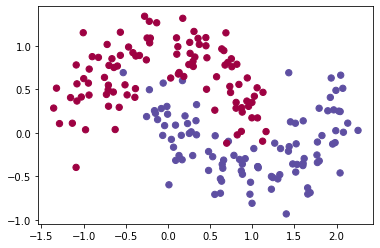

In [4]:
%matplotlib inline
#Generating the dataset
np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [5]:
num_examples = len(x) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [6]:
def calculate_loss(model,Activation=np.tanh):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = x.dot(W1) + b1
    a1 = Activation(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [7]:
# Helper function to predict an output (0 or 1)
def predict(model, X,Activation=np.tanh):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = Activation(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [8]:
#This function learns parameters for the neural network and returns the model.
#- nn_hdim: Number of nodes in the hidden layer
#- num_passes: Number of passes through the training data for gradient descent
#- print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim,Activation=np.tanh,DeActivation=lambda c:(1-np.power(c,2)) , num_passes=20000, print_loss=False,epsilonRate=1):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    #This is what we return at the end
    model = {}
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        # Forward propagation
        z1 = x.dot(W1) + b1
        a1 = Activation(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * DeActivation(a1)
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset.
        if print_loss and i % 1000 == 0:
            print ("Iteration:", i, "Loss:", calculate_loss(model,Activation))
        if i%50==0:
            epsilon*=epsilonRate
    return model

# 1
Build a model with a 3-dimensional hidden layer and plot the decision boundary

In [150]:
model=build_model(3)
model

{'W1': array([[ 2.99440249, -4.09432287,  3.42862848],
        [ 2.64089263,  0.74897207, -0.75796354]]),
 'b1': array([[-2.24661516,  5.01160913,  1.27405537]]),
 'W2': array([[ 4.40506969, -4.34266637],
        [ 4.85328582, -4.82927085],
        [-2.64906874,  2.77394213]]),
 'b2': array([[-0.96769708,  0.96769708]])}

In [9]:
display(pd.DataFrame(x))
pd.DataFrame(y)

,0,1
0,0.743461,0.464656
1,1.657557,-0.632032
2,-0.158789,0.255845
3,-1.088752,-0.396943
4,1.768052,-0.254432
...,...,...
195,-0.563659,0.891897
196,1.604981,0.138355
197,0.276957,0.012108
198,0.259194,1.041042


,0
0,0
1,1
2,1
3,0
4,1
...,...
195,0
196,1
197,1
198,0


In [10]:
predict(model,x)

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [17]:
def Plot(Activation=np.tanh,h=False,pred=predict):
    t = 1.0
    xMin, xMax = np.round(x[:,0].min())-t, np.round(x[:,0].max()+t)
    yMin, yMax = np.round(x[:,1].min())-t, np.round(x[:,1].max()+t)
    print(f"x_min: {xMin} | x_max: {xMax}")
    print(f"y_min: {yMin} | y_max: {yMax}")
    step = 0.1
    xT , yT = np.arange(xMin,xMax, step),np.arange(yMin,yMax, step)
    xGrid, yGrid = np.meshgrid(xT, yT)
    cGrid=pred(model,np.array([xGrid.flatten(),yGrid.flatten()]).T,Activation=Activation)
    fig, ax = plt.subplots(nrows=1, ncols=1,dpi=100)
    c = ax.contourf(xGrid, yGrid, cGrid.reshape(xGrid.shape), cmap=plt.cm.binary)
    fig.colorbar(c)
    if h:
        ax.scatter(x[:,0], x[:,1], s=40, c=y,edgecolor="k")
    else:
        ax.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


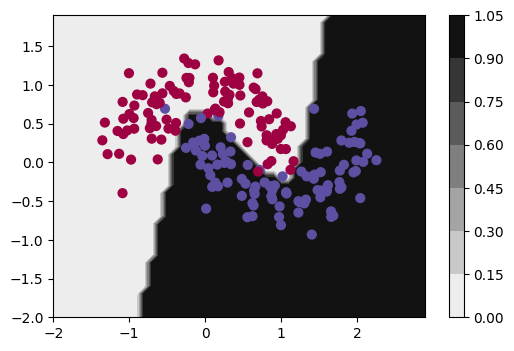

In [151]:
Plot()

# 2
In the above we picked a hidden layer size of 3. Let's now get a sense of how varying the
hidden layer size (1, 2, 3, 4, 5, 20, 40) aects the result. For each hidden layer size, please
plot the decision boundary.

it is obvious if we set nn_hdim bigger than 3 we have overfit and we have to take too much time to compute model

### nn_hdim:1

In [152]:
model=build_model(1)
model

{'W1': array([[ 0.33988978],
        [-1.86612505]]),
 'b1': array([[0.30807102]]),
 'W2': array([[-1.45862784,  1.89431396]]),
 'b2': array([[ 0.21452833, -0.21452833]])}

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


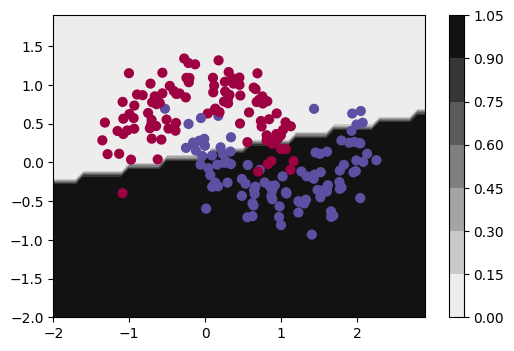

In [153]:
Plot()

### nn_hdim:2

In [156]:
model=build_model(2)
model

{'W1': array([[ 8.38529643, -3.73992419],
        [ 4.0373464 ,  3.88935221]]),
 'b1': array([[-4.24185383, -1.49998474]]),
 'W2': array([[ 5.08110324, -4.99591507],
        [ 6.13798363, -6.0615555 ]]),
 'b2': array([[ 0.66557629, -0.66557629]])}

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


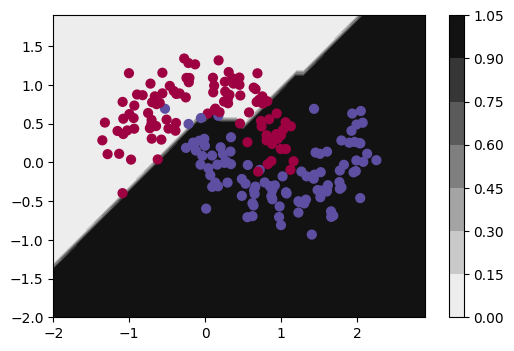

In [157]:
Plot()

### nn_hdim:3

In [158]:
model=build_model(3)
model

{'W1': array([[ 2.99440249, -4.09432287,  3.42862848],
        [ 2.64089263,  0.74897207, -0.75796354]]),
 'b1': array([[-2.24661516,  5.01160913,  1.27405537]]),
 'W2': array([[ 4.40506969, -4.34266637],
        [ 4.85328582, -4.82927085],
        [-2.64906874,  2.77394213]]),
 'b2': array([[-0.96769708,  0.96769708]])}

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


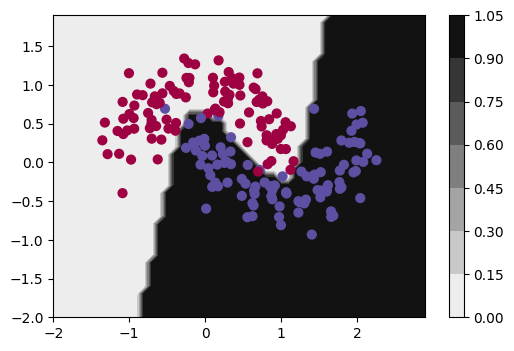

In [159]:
Plot()

### nn_hdim:4

In [160]:
model=build_model(4)
model

{'W1': array([[ 3.97258861,  4.87820341,  0.45613022,  5.06165394],
        [ 4.73348984, -2.50402496,  6.0978968 , -5.71040177]]),
 'b1': array([[-3.11977728, -5.73758499, -2.00211297,  3.48943669]]),
 'W2': array([[ 6.42686769, -6.40607011],
        [-6.61593592,  6.72407946],
        [-4.03700979,  4.09673491],
        [-5.61054649,  5.66315537]]),
 'b2': array([[-0.80191716,  0.80191716]])}

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


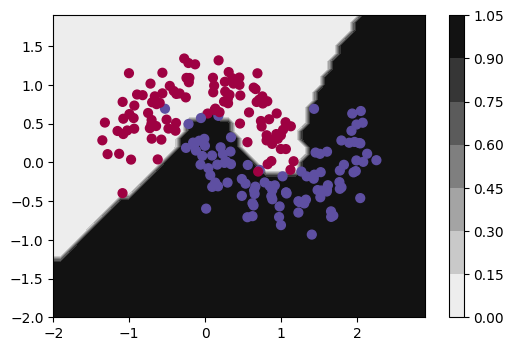

In [161]:
Plot()

### nn_hdim:5

In [162]:
model=build_model(5)
model

{'W1': array([[ 5.79891235, -5.14641659,  3.50477806,  8.45814086,  4.83995373],
        [-6.13263811, -4.75733737, -0.52432744,  2.54281254,  7.56122535]]),
 'b1': array([[ 3.25227595,  0.3461144 , -4.06274282, -3.9258305 , -4.00719387]]),
 'W2': array([[-4.44303432,  4.53976084],
        [ 4.65577649, -4.60235672],
        [-6.64824346,  6.69529827],
        [ 6.48703007, -6.40902752],
        [ 4.27269672, -4.30543851]]),
 'b2': array([[ 0.43304873, -0.43304873]])}

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


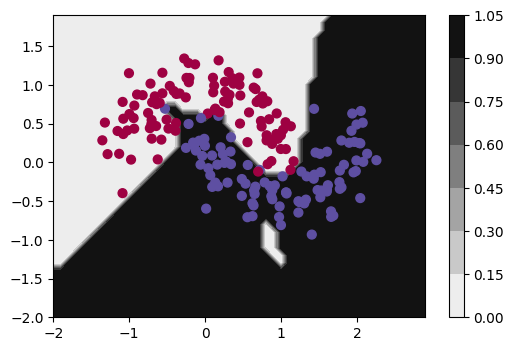

In [164]:
Plot()

### nn_hdim:20

In [165]:
model=build_model(20)
model

{'W1': array([[ 3.18647923,  1.86757703,  0.30052821,  5.34465597,  6.140499  ,
         -4.3546704 ,  1.98821213,  0.38793917, -0.44364994,  2.39044157,
          0.37452426,  2.40870515,  3.31694315,  1.22430004,  2.64063931,
          0.36791517,  4.90481192, -0.39538197,  1.19013337, -1.44822879],
        [-3.65371833, -0.52486244, -0.0714969 , -6.03595407, -1.14246759,
         -6.56509069, -0.54856687, -0.14508736,  0.15513539,  8.26931751,
         -0.1009439 ,  0.29305181, -0.64447342, -0.3895311 , -0.63294398,
         -0.09438182,  0.82991968,  0.12501885, -0.35897829,  0.42220046]]),
 'b1': array([[-4.14266812, -2.42860457, -0.09373214,  3.20027886,  4.65851761,
          3.92239441, -2.56448446,  0.5865286 , -0.65830813, -3.46250006,
          0.44962299, -1.20438881, -4.14460828,  1.40950955, -3.3257834 ,
          0.42298765, -2.37785522,  0.67665012, -1.70088918,  1.97242146]]),
 'W2': array([[-3.41446317,  3.33976702],
        [-1.21065733,  1.21805578],
        [-0.322

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


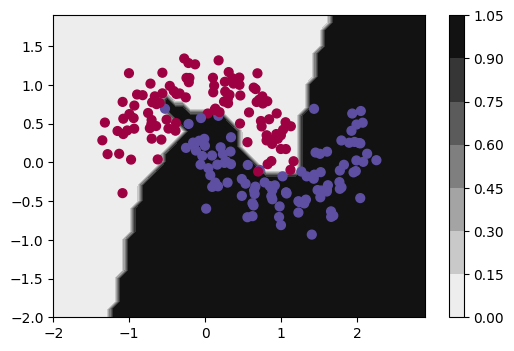

In [166]:
Plot()

### nn_hdim:40

In [167]:
model=build_model(40)
model

{'W1': array([[ 2.44236094,  0.07962011,  0.65150089,  4.63585841,  5.05531647,
         -2.17140171,  0.86557955, -0.12074143,  0.16055594,  0.24054959,
         -0.256177  ,  0.17991485,  0.54516843,  0.07817828,  0.24636679,
          0.24306298,  0.19286061, -0.18255242,  0.15527417, -1.94391123,
         -5.08503719,  0.79703324,  1.01325086, -2.51498318,  3.33179202,
         -0.73311056,  0.13751092, -0.17398933,  1.94337263,  1.08289471,
          0.27112368,  0.24462747, -0.52464496, -6.02658725, -0.1870221 ,
          0.10070025,  2.69136076,  2.70556976, -0.38806929, -0.20269353],
        [-0.7705168 , -0.96160741, -0.34305319,  7.00456017, -4.97274953,
          0.72900572, -0.39921134,  0.80699677, -0.61314236, -0.39201884,
          0.18943919, -0.60574172, -0.3265815 , -0.9342814 , -0.3752725 ,
         -0.36527972, -0.55958013,  0.57581472, -0.69637279,  0.68397211,
          0.4508135 , -0.38215711, -0.43845284, -9.56227554, -1.33146967,
          0.34579194, -0.726098

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


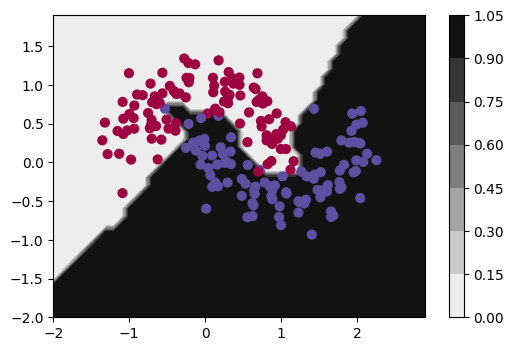

In [169]:
Plot()

# 3 
Instead of batch gradient descent, use mini-batch gradient descent to train the network.
Mini-batch gradient descent typically performs better in practice

as you can see we use batch_size=32 and we produce dw for each batch and set w for them

In [170]:
#This function learns parameters for the neural network and returns the model.
#- nn_hdim: Number of nodes in the hidden layer
#- num_passes: Number of passes through the training data for gradient descent
#- print_loss: If True, print the loss every 1000 iterations
def build_model_Mini(nn_hdim,batch_size=32, num_passes=20000, print_loss=False):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    #This is what we return at the end
    model = {}
    #Mini Batch Gradient descent. For each batch...
    for i in range(0, num_passes):
        for j in range(0,len(x),batch_size):
            r=min(len(x),j+batch_size)
            # Forward propagation
            z1 = x[j:r].dot(W1) + b1
            a1 = np.tanh(z1)
            z2 = a1.dot(W2) + b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            # Backpropagation
            delta3 = probs
            delta3[range(r-j), y[j:r]] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(x[j:r].T, delta2)
            db1 = np.sum(delta2, axis=0)
            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1
            # Gradient descent parameter update
            W1 += -epsilon * dW1
            b1 += -epsilon * db1
            W2 += -epsilon * dW2
            b2 += -epsilon * db2
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset.
        if print_loss and i % 1000 == 0:
            print ("Iteration:", i, "Loss:", calculate_loss(model))
    return model

In [171]:
model=build_model_Mini(3)
model

{'W1': array([[ 2.95870722, -3.26661297,  3.77229561],
        [ 2.79147111,  0.49526852, -0.66827003]]),
 'b1': array([[-2.20362203, -1.23179779, -4.6108644 ]]),
 'W2': array([[ 3.18138212, -3.18138174],
        [ 2.56943198, -2.56943183],
        [-3.38305491,  3.38305568]]),
 'b2': array([[-0.51925749,  0.51925749]])}

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


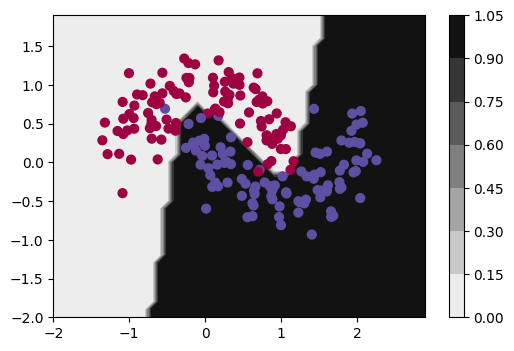

In [172]:
Plot()

# 4
We used a fixed learning rate for gradient descent. Implement an annealing schedule for
the gradient descent learning rate.
we use stepdecay,step decay where the learning rate is reduced by some percentage after a set number of training epochs. we test epsilonRate and we found out epsilonRate=0.999 and epsilonDecayDelay=50 ( after each 50 iterations we reduce learning rate ) are good

In [55]:
epsilon = 0.01
model=build_model(4)
display(model)
print('loss: ')
calculate_loss(model)

{'W1': array([[ 3.97258861,  4.87820341,  0.45613022,  5.06165394],
        [ 4.73348984, -2.50402496,  6.0978968 , -5.71040177]]),
 'b1': array([[-3.11977728, -5.73758499, -2.00211297,  3.48943669]]),
 'W2': array([[ 6.42686769, -6.40607011],
        [-6.61593592,  6.72407946],
        [-4.03700979,  4.09673491],
        [-5.61054649,  5.66315537]]),
 'b2': array([[-0.80191716,  0.80191716]])}

loss: 


0.05782882165069556

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


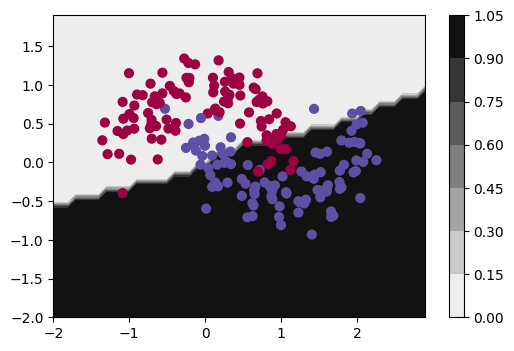

In [50]:
Plot()

In [60]:
epsilon = 0.01
model=build_model(4,epsilonRate=0.99)
display(model)
print('loss: ')
calculate_loss(model)

{'W1': array([[ 3.92021843,  3.5119914 ,  6.34290095,  2.28675291],
        [ 5.11945655, -0.51854914,  0.5020225 ,  0.05192002]]),
 'b1': array([[-3.29563998, -4.11765687, -3.11042268,  0.21082781]]),
 'W2': array([[ 4.16187235, -4.0673618 ],
        [-5.75022428,  6.24166157],
        [ 3.92331132, -3.65190211],
        [-5.25721984,  5.49629064]]),
 'b2': array([[-0.83787182,  0.83787182]])}

loss: 


0.055647336770541136

In [64]:
epsilon = 0.01
model=build_model(4,epsilonRate=0.999)
display(model)
print('loss: ')
calculate_loss(model)

{'W1': array([[ 3.49503884,  4.65181507,  0.65126811,  4.5708189 ],
        [ 3.94158471, -2.27902478,  6.01412391, -5.12974513]]),
 'b1': array([[-2.80300237, -5.34756671, -1.94631076,  3.14778715]]),
 'W2': array([[ 6.91551125, -6.88592194],
        [-6.93562449,  7.08948343],
        [-4.01320779,  4.09818045],
        [-5.70960649,  5.78445465]]),
 'b2': array([[-0.85281922,  0.85281922]])}

loss: 


0.04953161120437751

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


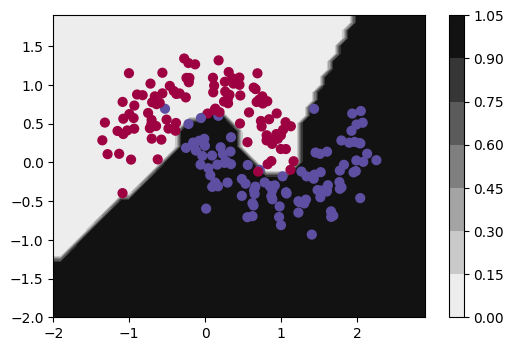

In [65]:
Plot()

# 5
We used a tanh activation function for our hidden layer. Experiment with other activation
functions (some are mentioned above). Note that changing the activation function also
means changing the backpropagation derivative.

## Logistic Activation Function

In [173]:
model=build_model(3,Activation=lambda c:1/(1+np.exp(-c)),DeActivation=lambda c:c*(1-c))
model

{'W1': array([[ 5.64250587, -6.28800856,  7.49477936],
        [ 4.93361175,  0.99528857, -1.35734387]]),
 'b1': array([[-4.08014955, -2.23933623, -9.06602899]]),
 'W2': array([[ 7.80244505, -7.74004174],
        [ 5.69682172, -5.67280674],
        [-7.87082157,  7.99569496]]),
 'b2': array([[-3.37457594,  3.37457594]])}

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


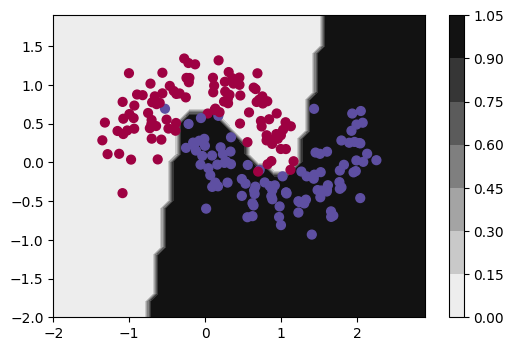

In [174]:
Plot(Activation=lambda c:1/(1+np.exp(-c)))

## ReLU

In [175]:
def Relu(c):
    d=c.copy()
    d[d<0]=0
    return d
def DeRelu(c):
    return (c>=0)*1

In [176]:
model=build_model(3,Activation=Relu,DeActivation=DeRelu)
model

{'W1': array([[ 1.33428875, -1.15072722,  0.8523715 ],
        [-4.90697528,  4.98989391, -2.95930265]]),
 'b1': array([[-0.73911455, -0.88303873, -0.40214546]]),
 'W2': array([[-0.54914075,  0.61154406],
        [ 0.60763897, -0.583624  ],
        [-0.3860944 ,  0.51096779]]),
 'b2': array([[-0.17586037,  0.17586037]])}

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


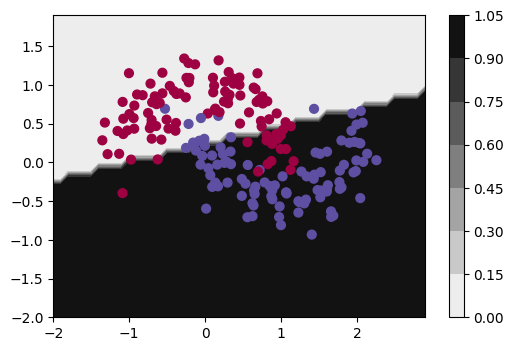

In [177]:
Plot(Activation=Relu)

## ArcTan

In [178]:
model=build_model(3,Activation=np.arctan,DeActivation=lambda c:1/(1+np.power(c,2)))
model

{'W1': array([[ 3.80937978, -5.39648949,  4.0106398 ],
        [ 3.07607763,  0.72885157, -0.29489216]]),
 'b1': array([[-2.70654308,  6.7762703 ,  1.33462783]]),
 'W2': array([[ 3.44655054, -3.38414723],
        [ 3.57935394, -3.55533897],
        [-2.30952891,  2.43440231]]),
 'b2': array([[-1.24799577,  1.24799577]])}

x_min: -2.0 | x_max: 3.0
y_min: -2.0 | y_max: 2.0


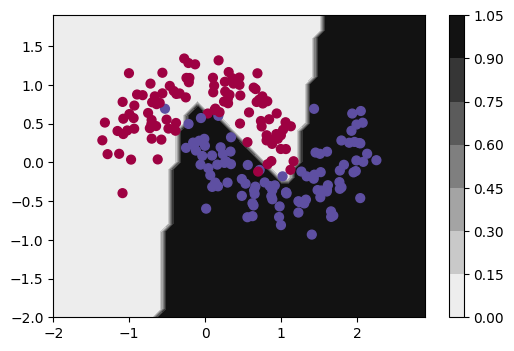

In [179]:
Plot(Activation=np.arctan)

# 6
Extend the network from two to three classes. You will need to generate an appropriate
dataset for this.

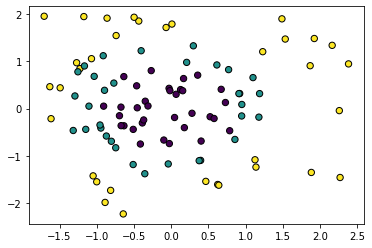

In [19]:
x, y =sklearn.datasets.make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(x[:,0], x[:,1], s=40, c=y, edgecolor="k")

In [20]:
num_examples = len(x)
nn_output_dim = 3

In [184]:
model=build_model(4)
model

{'W1': array([[-1.35641387,  1.56599606,  2.06541161,  3.79794036],
        [ 2.15371471, -1.94291895,  1.31110762,  2.18712092]]),
 'b1': array([[ 2.60453937,  2.79941038, -2.53426655,  4.71949151]]),
 'W2': array([[ 8.00274563,  1.47610681, -9.44830875],
        [ 8.83599438,  0.54189048, -9.21976233],
        [-9.55524678, -0.24105866,  9.950005  ],
        [ 9.08842604, -0.53579927, -8.60311439]]),
 'b2': array([[-26.46166231,   2.50313098,  23.95853133]])}

x_min: -4.0 | x_max: 3.0
y_min: -3.0 | y_max: 3.0


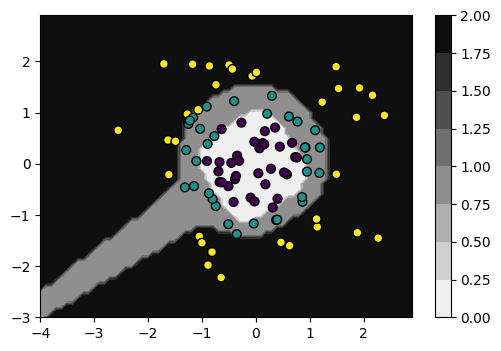

In [185]:
Plot(h=True)

In [186]:
model=build_model(8)
model

{'W1': array([[ 4.09251069, -4.54039363,  2.47405974,  2.03265132,  4.02849349,
          1.10665847, -2.65866406, -0.07478326],
        [-0.38131726,  6.23603496, -0.73509753,  2.93899641,  1.27742915,
          3.49528173,  5.77306368,  0.06971754]]),
 'b1': array([[  3.25162487, -11.27681572,  -2.16655468,  -2.61304613,
           5.03944708,   2.93883561,  -3.23681257,  -3.4576002 ]]),
 'W2': array([[  4.02961565,  -3.31441677,  -0.6385542 ],
        [ -0.90936858,  -4.86886678,   5.64649997],
        [-11.60773096,   0.61849244,  11.10368132],
        [ -4.85456025,   1.72029176,   3.05792032],
        [  1.95834985,   3.91612919,  -5.72343314],
        [  8.10049342,  -1.22145041,  -6.99819331],
        [ -4.89591611,  -0.98345645,   5.92906888],
        [  3.78817269,   0.31308693,  -4.07672787]]),
 'b2': array([[-16.46241322,  -0.63107878,  17.093492  ]])}

x_min: -4.0 | x_max: 3.0
y_min: -3.0 | y_max: 3.0


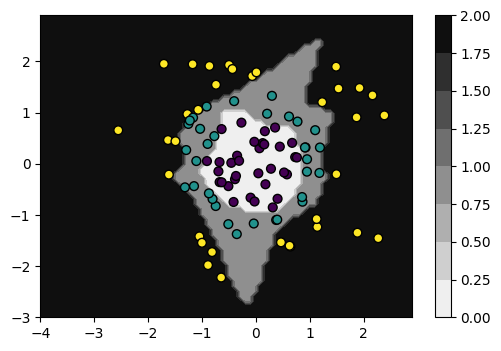

In [187]:
Plot(h=True)

In [188]:
model=build_model(12)
model

{'W1': array([[ 4.58564944,  0.0138284 ,  1.95882478,  3.50830141,  2.62871315,
         -3.52409796,  2.31233792,  0.87812809,  1.91498366, -0.01976507,
          0.347652  ,  3.4203043 ],
        [ 0.79237378, -0.0438788 , -1.97961006, -0.82132353,  3.71244933,
         -4.03759059, -1.51874503, -2.02213927, -5.11810049,  0.05921649,
          7.47849118,  0.54777692]]),
 'b1': array([[ 3.15274982,  3.36408514,  3.48556792, -2.60937005,  3.1312019 ,
          3.59625554, -1.28759374, -1.92017618,  2.68214332, -2.72506066,
         -6.63505785,  4.36121748]]),
 'W2': array([[ 6.20952136, -1.36469229, -4.81118919],
        [-3.1454804 , -0.24697686,  3.5024207 ],
        [ 1.35164851,  3.03731792, -4.4028215 ],
        [-5.62687062,  0.19086086,  5.35114865],
        [ 5.07538404, -1.72114393, -3.27434075],
        [ 4.57598851,  0.71530433, -5.39953432],
        [-4.75183737,  2.41958653,  2.32189313],
        [-3.90014173, -3.29617786,  7.16063932],
        [ 5.00832057, -2.89694079,

x_min: -4.0 | x_max: 3.0
y_min: -3.0 | y_max: 3.0


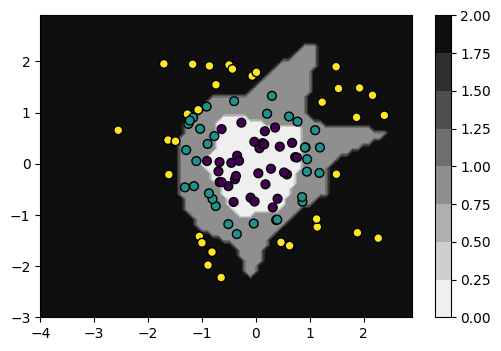

In [189]:
Plot(h=True)

# 7
here we create two function build model ez and predict ez that have 4 layers ( 2 hidden layers )

In [12]:
#This function learns parameters for the neural network and returns the model.
#- nn_hdim: Number of nodes in the hidden layer
#- num_passes: Number of passes through the training data for gradient descent
#- print_loss: If True, print the loss every 1000 iterations
def build_model_Ez(nn_hdim,Activation=np.tanh,DeActivation=lambda c:(1-np.power(c,2)) , num_passes=20000):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W11 = np.random.randn(nn_hdim, nn_hdim) / np.sqrt(nn_hdim)
    b11 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    #This is what we return at the end
    model = {}
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        # Forward propagation
        z1 = x.dot(W1) + b1
        a1 = Activation(z1)
        z11=a1.dot(W11)+b11
        a11=Activation(z11)
        z2 = a11.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a11.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * DeActivation(a11)
        dW11=np.dot(a1.T,delta2)
        db11=np.sum(delta2,axis=0)
        delta11=delta2.dot(W11.T)*DeActivation(a1)
        dW1 = np.dot(x.T, delta11)
        db1 = np.sum(delta11, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW11+=reg_lambda*W11
        dW1 += reg_lambda * W1
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W11+= -epsilon*dW11
        b11+= -epsilon*db11
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1,'W11':W11,'b11':b11, 'W2': W2, 'b2': b2}
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset.
    return model

In [34]:
def predict_Ez(model, X,Activation=np.tanh):
    W1, b1,W11,b11, W2, b2 = model['W1'], model['b1'],model['W11'],model['b11'], model['W2'], model['b2']
    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = Activation(z1)
    z11=a1.dot(W11)+b11
    a11=Activation(z11)
    z2 = a11.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [21]:
model=build_model_Ez(3)
model

{'W1': array([[ 1.59830797, -1.9494466 ,  4.9260258 ],
        [ 2.63703424,  2.37543318, -0.03978126]]),
 'b1': array([[-2.52285969,  1.97312718,  3.54353451]]),
 'W11': array([[-1.90596603, -5.25796333, -5.9390368 ],
        [ 6.90134927,  6.19577403,  5.55178352],
        [ 6.82195224,  3.92975557,  5.00121641]]),
 'b11': array([[ -2.50083067, -12.55726472,  -5.56021558]]),
 'W2': array([[ 2.66113932,  0.32133629, -2.85570542],
        [ 2.57420278, -1.25784066, -1.5580917 ],
        [ 4.74837248,  0.08747464, -4.77522837]]),
 'b2': array([[-4.14493615,  0.90548793,  3.23944822]])}

In [35]:
predict_Ez(model,x)

array([0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2,
       1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2,
       1, 2, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2,
       1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0])

x_min: -3.0 | x_max: 3.0
y_min: -3.0 | y_max: 3.0


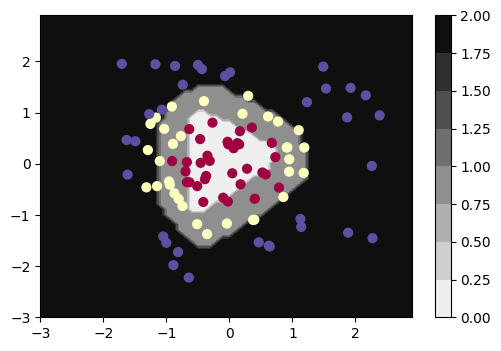

In [36]:
Plot(pred=predict_Ez)